In [21]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# ---------------------------------------------------------------------------
# Projektpfad setzen, damit "model" importierbar ist
# ---------------------------------------------------------------------------
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from model.simulation import (
    load_scenario,
    simulate_load_profile,
    load_vehicle_profiles_from_csv,  # falls du weiter oben die Flotte anschauen willst
)

In [22]:
# ---------------------------------------------------------------------------
# Szenario laden und Simulation durchführen
# ---------------------------------------------------------------------------
scenario_name = "highway"            # gewünschtes Szenario
scenario_path = f"../scenarios/{scenario_name}.yaml"

scenario = load_scenario(scenario_path)
timestamps, load_kw, sessions = simulate_load_profile(scenario)

# ---------------------------------------------------------------------------
# Kontrollen: Standorttyp, Zeitbereich und Simulationshorizont
# ---------------------------------------------------------------------------
print("Verwendetes Szenario:", scenario_name)
print(f"Erster Timestamp: {timestamps[0]}")
print(f"Letzter Timestamp: {timestamps[-1]}")
print(f"Simulationshorizont: {scenario['simulation_horizon_days']} Tage")

Verwendetes Szenario: highway
Erster Timestamp: 2025-05-19 00:00:00
Letzter Timestamp: 2025-05-20 23:00:00
Simulationshorizont: 2 Tage


In [23]:
# ---------------------------------------------------------------------------
# 1) Überblick: Anzahl Sessions und Beispiel-Sessions
# ---------------------------------------------------------------------------
print("\nAnzahl Ladesessions im Simulationshorizont:", len(sessions))
print("\nBeispiel-Sessions (erste 10):")

for s in sessions[:10]:
    print(
        f"Fahrzeug: {s['vehicle_name']}, "
        f"Ankunft: {s['arrival_time']}, "
        f"Abfahrt: {s['departure_time']}, "
        f"Kapazität: {s['battery_capacity_kwh']} kWh, "
        f"benötigte Energie: {s['energy_required_kwh']:.1f} kWh"
    )

# ---------------------------------------------------------------------------
# 2) Auswertung: welche Fahrzeuge wurden wie oft geladen?
# ---------------------------------------------------------------------------
vehicle_names = [s["vehicle_name"] for s in sessions]
counts = Counter(vehicle_names)

print("\nVerwendete Fahrzeuge im Simulationshorizont:")
for model, n in counts.items():
    print(f"- {model}: {n} Sessions")

# Optional: mit Anteilen
total_sessions = len(sessions)
print(f"\nGesamtanzahl Sessions: {total_sessions}\n")
print("Modell           | Sessions | Anteil [%]")
print("----------------------------------------")
for model, n in counts.items():
    share = 100 * n / total_sessions if total_sessions > 0 else 0.0
    print(f"{model:15s} | {n:8d} | {share:8.1f}")


Anzahl Ladesessions im Simulationshorizont: 229

Beispiel-Sessions (erste 10):
Fahrzeug: EV6, Ankunft: 2025-05-19 12:09:31.954056, Abfahrt: 2025-05-19 15:09:31.954056, Kapazität: 77.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: EQE, Ankunft: 2025-05-19 13:43:35.992146, Abfahrt: 2025-05-19 16:43:35.992146, Kapazität: 91.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: Model S, Ankunft: 2025-05-19 13:47:07.339185, Abfahrt: 2025-05-19 16:47:07.339185, Kapazität: 100.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: iX M60 xDrive, Ankunft: 2025-05-19 14:01:58.961536, Abfahrt: 2025-05-19 17:01:58.961536, Kapazität: 102.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: Corsa e, Ankunft: 2025-05-19 14:34:14.435867, Abfahrt: 2025-05-19 17:34:14.435867, Kapazität: 50.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: EQE SUV, Ankunft: 2025-05-19 15:07:36.947518, Abfahrt: 2025-05-19 18:07:36.947518, Kapazität: 91.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: EQE, Ankunft: 2025-05-19 15:18:07.659964, Abfahrt: 2025-05-19 18

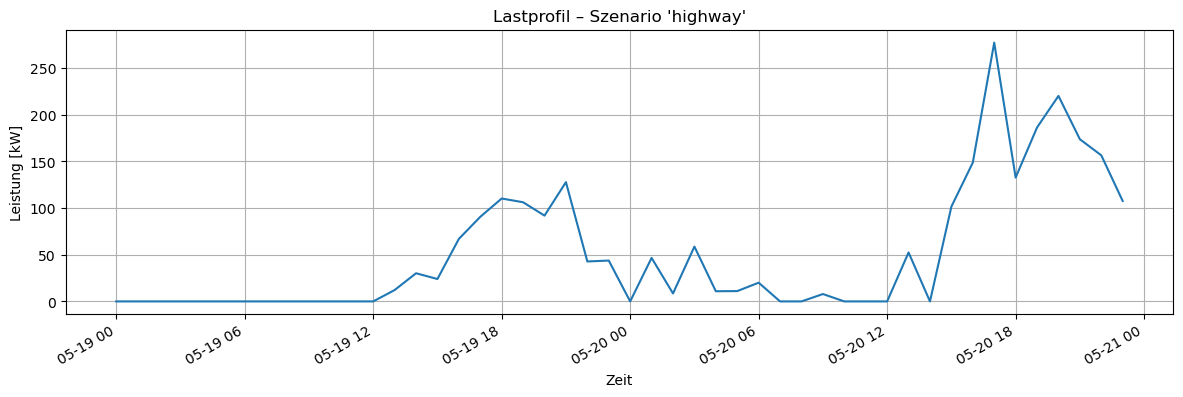

In [24]:
# ---------------------------------------------------------------------------
# 3) Lastprofil als Diagramm
# ---------------------------------------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(timestamps, load_kw)
plt.xlabel("Zeit")
plt.ylabel("Leistung [kW]")
plt.title(f"Lastprofil – Szenario '{scenario_name}'")
plt.grid(True)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()


Verwendetes Szenario: highway
Erster Timestamp: 2025-05-19 00:00:00
Letzter Timestamp: 2025-05-20 23:00:00
Simulationshorizont: 2 Tage

Anzahl Ladesessions im Simulationshorizont: 368

Beispiel-Sessions (erste 10):
Fahrzeug: Model Y, Ankunft: 2025-05-19 10:34:14.434853, Abfahrt: 2025-05-19 13:34:14.434853, Kapazität: 65.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: e-tron GT, Ankunft: 2025-05-19 11:13:41.741849, Abfahrt: 2025-05-19 14:13:41.741849, Kapazität: 97.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: ID.4, Ankunft: 2025-05-19 11:42:33.535846, Abfahrt: 2025-05-19 14:42:33.535846, Kapazität: 77.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: EQE SUV, Ankunft: 2025-05-19 11:56:58.819917, Abfahrt: 2025-05-19 14:56:58.819917, Kapazität: 91.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: i5 Touring, Ankunft: 2025-05-19 12:13:00.176564, Abfahrt: 2025-05-19 15:13:00.176564, Kapazität: 81.0 kWh, benötigte Energie: 0.0 kWh
Fahrzeug: CLA, Ankunft: 2025-05-19 12:34:34.752431, Abfahrt: 2025-05-19 15:34:

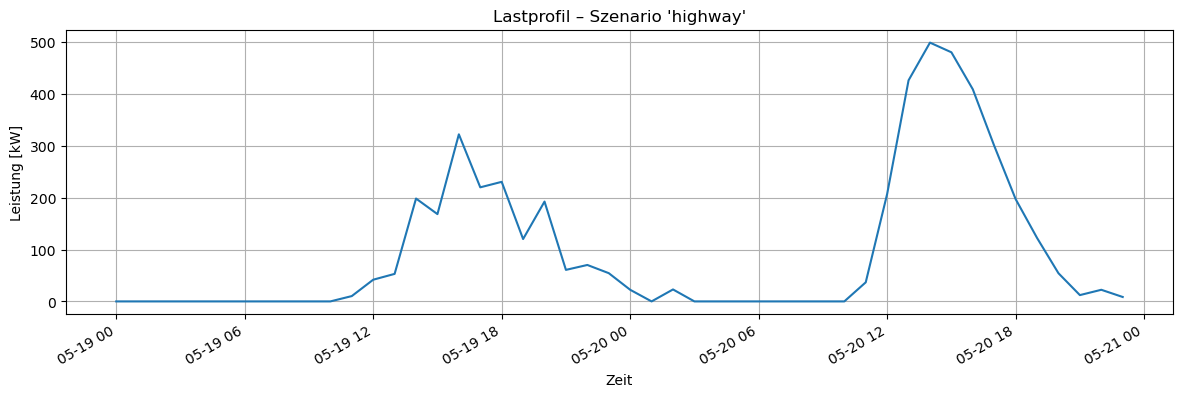

In [25]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# ---------------------------------------------------------------------------
# Projektpfad setzen, damit "model" importierbar ist
# ---------------------------------------------------------------------------
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from model.simulation import (
    load_scenario,
    simulate_load_profile,
    load_vehicle_profiles_from_csv,  # falls du weiter oben die Flotte anschauen willst
)

# ---------------------------------------------------------------------------
# Szenario laden und Simulation durchführen
# ---------------------------------------------------------------------------
scenario_name = "highway"            # gewünschtes Szenario
scenario_path = f"../scenarios/{scenario_name}.yaml"

scenario = load_scenario(scenario_path)
timestamps, load_kw, sessions = simulate_load_profile(scenario)

# ---------------------------------------------------------------------------
# Kontrollen: Standorttyp, Zeitbereich und Simulationshorizont
# ---------------------------------------------------------------------------
print("Verwendetes Szenario:", scenario_name)
print(f"Erster Timestamp: {timestamps[0]}")
print(f"Letzter Timestamp: {timestamps[-1]}")
print(f"Simulationshorizont: {scenario['simulation_horizon_days']} Tage")

# ---------------------------------------------------------------------------
# 1) Überblick: Anzahl Sessions und Beispiel-Sessions
# ---------------------------------------------------------------------------
print("\nAnzahl Ladesessions im Simulationshorizont:", len(sessions))
print("\nBeispiel-Sessions (erste 10):")

for s in sessions[:10]:
    print(
        f"Fahrzeug: {s['vehicle_name']}, "
        f"Ankunft: {s['arrival_time']}, "
        f"Abfahrt: {s['departure_time']}, "
        f"Kapazität: {s['battery_capacity_kwh']} kWh, "
        f"benötigte Energie: {s['energy_required_kwh']:.1f} kWh"
    )
# ---------------------------------------------------------------------------
# 2) Auswertung: welche Fahrzeuge wurden wie oft geladen?
# ---------------------------------------------------------------------------
vehicle_names = [s["vehicle_name"] for s in sessions]
counts = Counter(vehicle_names)

print("\nVerwendete Fahrzeuge im Simulationshorizont:")
for model, n in counts.items():
    print(f"- {model}: {n} Sessions")



# ---------------------------------------------------------------------------
# 3) Lastprofil als Diagramm
# ---------------------------------------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(timestamps, load_kw)
plt.xlabel("Zeit")
plt.ylabel("Leistung [kW]")
plt.title(f"Lastprofil – Szenario '{scenario_name}'")
plt.grid(True)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()
